In [5]:
import numpy as np
import pandas as pd
import sklearn


data1 = pd.read_table('amazon_cells_labelled.txt')
data2 = pd.read_table('imdb_labelled.txt')
data3 = pd.read_table('yelp_labelled.txt')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
frames = [data1,data2,data3]

for colname in frames:
    colname.columns = ["Message","Target"]

for colname in frames:
    print(colname.columns)

keys = ['Amazon','IMDB','Yelp']
df = pd.concat(frames,keys=keys)
df['Message'] = df['Message'].str.lower()
df.head()

Index(['Message', 'Target'], dtype='object')
Index(['Message', 'Target'], dtype='object')
Index(['Message', 'Target'], dtype='object')


Message  Target
Amazon 0                        good case, excellent value.       1
       1                             great for the jawbone.       1
       2  tied to charger for conversations lasting more...       0
       3                                  the mic is great.       1
       4  i have to jiggle the plug to get it to line up...       0

In [ ]:
df.shape


(2745, 2)

In [ ]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = stopwords.words('english')

In [ ]:

len(stop_words)

179

In [ ]:
negative_words=['no','not',"don't","aren't","couldn't","didn't","doesn't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","shouldn't","wasn't","weren't","won't","wouldn't"]
for negative_word in negative_words:
  stop_words.remove(negative_word)

len(stop_words)

160

In [ ]:
import re             # re -> regular expressions
REPLACE_BY_SPACE_RE = re.compile('[/(){}—[]|@,;‘?|।!-॥–’-]')

def clean_text(sample):
  sample = sample.lower()
  sample = sample.replace("", "")
  sample = REPLACE_BY_SPACE_RE.sub(' ', sample)
  sample = re.sub("[^a-z]+", " ", sample)
  sample = sample.split(" ")
  sample = [word for word in sample if word not in stop_words ]
  sample = " ".join(sample)
  return sample


In [ ]:
df['Message'] = df['Message'].apply(clean_text)
df.head()

Message  Target
Amazon 0                         good case excellent value        1
       1                                     great jawbone        1
       2  tied charger conversations lasting minutes maj...       0
       3                                         mic great        1
       4      jiggle plug get line right get decent volume        0

<Axes: >

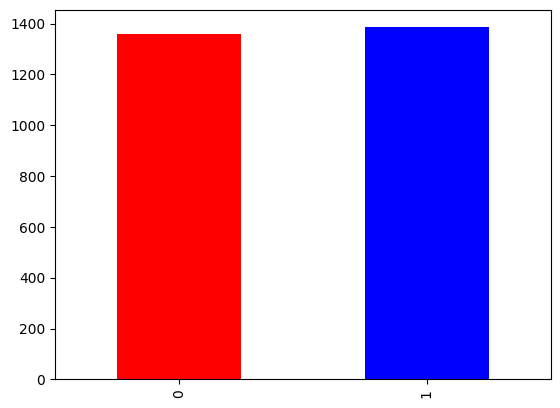

In [ ]:
import matplotlib.pyplot as plt
df['Target'].value_counts().sort_index().plot.bar(color=['red', 'blue', 'green'])

In [ ]:
x = df['Message'].values
y = df['Target'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0,stratify = y)

In [ ]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([1088, 1108]))

In [ ]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([272, 277]))

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',SVC())])

In [ ]:
text_model.fit(x_train,y_train)
y_pred = text_model.predict(x_test)
np.unique(y_pred,return_counts=True)

(array([0, 1]), array([274, 275]))

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred,y_test)*100

84.3351548269581

In [ ]:
confusion_matrix(y_pred,y_test)

array([[230,  44],
       [ 42, 233]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       274
           1       0.84      0.85      0.84       275

    accuracy                           0.84       549
   macro avg       0.84      0.84      0.84       549
weighted avg       0.84      0.84      0.84       549



In [ ]:
res = text_model.predict(["I am unhappy"])

In [ ]:
if res[0]==0:
  print("Negaive")
else:
  print("Positive")

Negaive
